**This is a Car Price Prediction Model which predict price based on features**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("hf://datasets/Vishaltiwari2019/Car-Price-Prediction/Car_Price_Prediction.csv")
dataset.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


**In this dataset here is no null values**

In [ ]:
dataset.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Size,0
Mileage,0
Fuel Type,0
Transmission,0
Price,0


### **Encoding the categorical variables**

**Encoding means coveting categorical data into numerical data. Here I use Ordinal Encoder it's encode features based on alphabatical order**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()

In [ ]:
dataset["Make"].unique()

array(['Honda', 'Ford', 'BMW', 'Audi', 'Toyota'], dtype=object)

**In Make column 5 different companies available we apply Ordinal Encoding. So, `Audi` convert in 0, `BMW` convert in 1, `Ford` convert in 2, `Honda` convert in 3 and finally `Toyota` convert in 4**

In [ ]:
encode.fit(dataset[["Make"]])
dataset["Make"] = encode.transform(dataset[["Make"]])

In [ ]:
dataset["Model"].unique()

array(['Model B', 'Model C', 'Model A', 'Model D', 'Model E'],
      dtype=object)

**In dataset, here is 5 different Model. So, `Model A` convert in 0, `Model B` convert in 1, `Model C` convert in 2, `Model D` convert in 3 and finally `Model E` convert in 4**

In [ ]:
encode.fit(dataset[["Model"]])
dataset["Model"] = encode.transform(dataset[["Model"]])

In [ ]:
dataset["Fuel Type"].unique()

array(['Petrol', 'Electric', 'Diesel'], dtype=object)

**Here is 3 different Fuel Type. So, `Diesel` convert in 0, `Electric` convert in 1 and in last `Petrol` convert in 2**

In [ ]:
encode.fit(dataset[["Fuel Type"]])
dataset["Fuel Type"] = encode.transform(dataset[["Fuel Type"]])

In [ ]:
dataset["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

**Here is 2 different Transmission. So, 0 for `Automatic` and 1 for `Manual`**

In [ ]:
encode.fit(dataset[["Transmission"]])
dataset["Transmission"] = encode.transform(dataset[["Transmission"]])

**In last, data has come in this form**

In [ ]:
dataset

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3.0,1.0,2015,3.9,74176,2.0,1.0,30246.207931
1,2.0,2.0,2014,1.7,94799,1.0,0.0,22785.747684
2,1.0,1.0,2006,4.1,98385,1.0,1.0,25760.290347
3,3.0,1.0,2015,2.6,88919,1.0,0.0,25638.003491
4,3.0,2.0,2004,3.4,138482,2.0,0.0,21021.386657
...,...,...,...,...,...,...,...,...
995,4.0,3.0,2002,1.9,5445,2.0,1.0,22765.597091
996,3.0,1.0,2020,3.1,149112,0.0,1.0,30392.575567
997,2.0,2.0,2008,1.9,195387,2.0,0.0,16446.892292
998,4.0,0.0,2003,4.4,246,2.0,0.0,27396.156708


In [ ]:
cols = list(dataset.columns)
cols

['Make',
 'Model',
 'Year',
 'Engine Size',
 'Mileage',
 'Fuel Type',
 'Transmission',
 'Price']

### **Checking data has outliers**

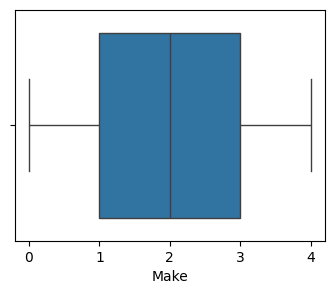

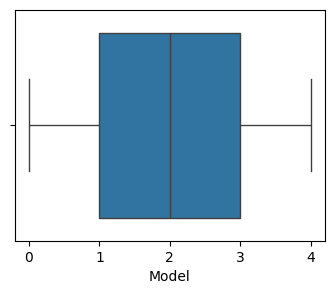

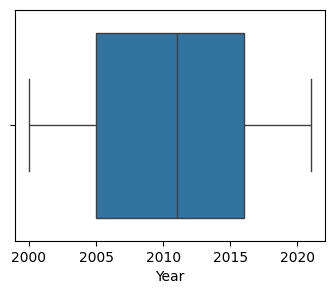

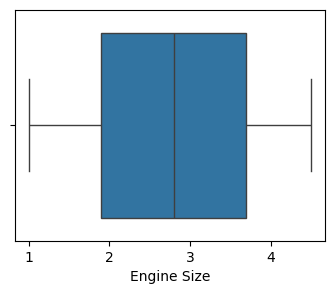

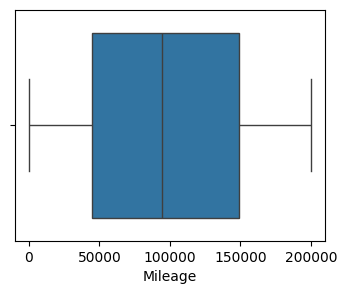

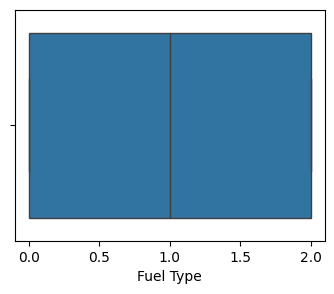

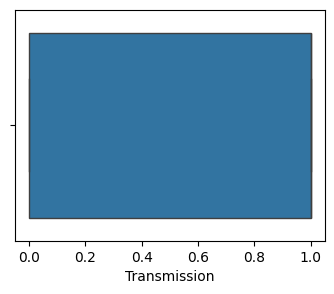

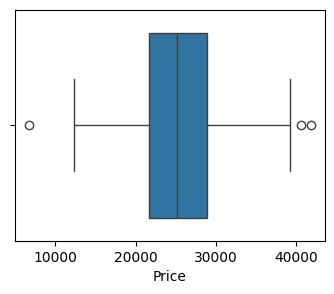

In [ ]:
for i in ['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type', 'Transmission', 'Price']:
    plt.figure(figsize = (4, 3))
    sns.boxplot(x = dataset[i])
    plt.show()

**Scalling the `Mileage` column because model trained well on minimum values**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset[["Mileage"]])

StandardScaler()

In [ ]:
dataset["Mileage"] = pd.DataFrame(scaler.transform(dataset[["Mileage"]]), columns = ["Mileage"])

<ipython-input-14-558d105d65a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


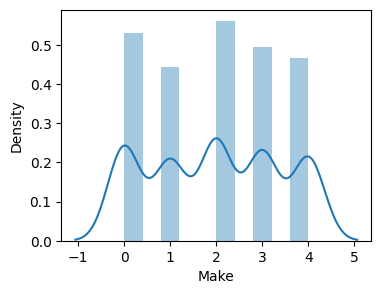

<ipython-input-14-558d105d65a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


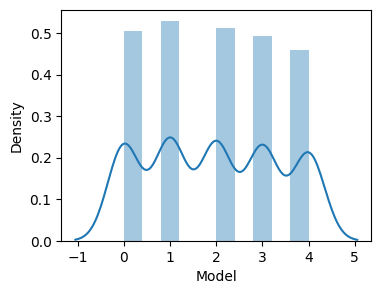

<ipython-input-14-558d105d65a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


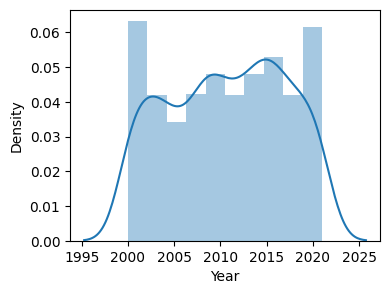

<ipython-input-14-558d105d65a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


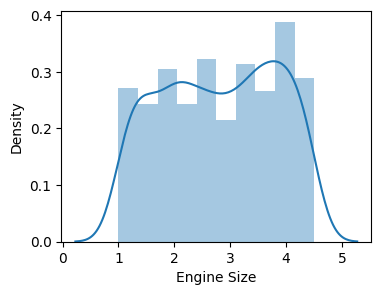

<ipython-input-14-558d105d65a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


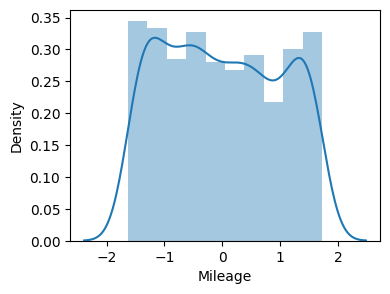

<ipython-input-14-558d105d65a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


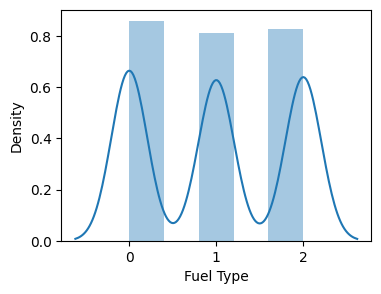

<ipython-input-14-558d105d65a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


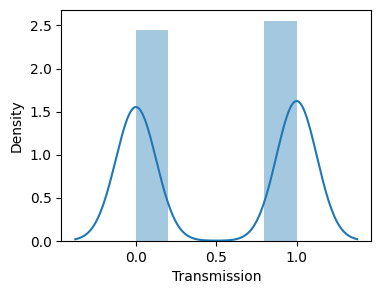

<ipython-input-14-558d105d65a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


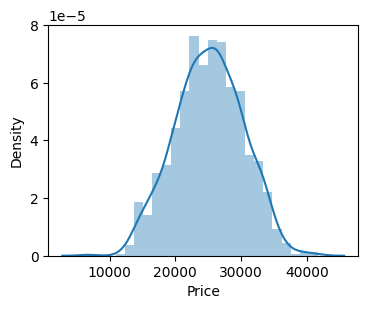

In [ ]:
for i in ['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type', 'Transmission', 'Price']:
    plt.figure(figsize = (4, 3))
    sns.distplot(dataset[i])
    plt.show()

### **Splitting the data for training and testing**

In [ ]:
x = dataset.iloc[:, :-1]
y = dataset["Price"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 52)

### **Finally Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**Trained Model accuracy is 87 which is good**

In [ ]:
model.score(x_test, y_test) * 100

83.29496855495142

**Now, Testing the model**

In [ ]:
model.predict([[3, 1, 2015, 3.9, -0.387, 2, 1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30534.62808864])